## ***Name : `Fawad Ali Shaikh`***
## ***Course : `Data Science`***
### ***Dataset :***  [***`Sleep Health And Lifestyle`***](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)


## ***Meta-Data***
## ***`Context:`***
Sleep plays a vital role in maintaining overall health and well-being. However, various lifestyle factors can significantly impact sleep quality and duration.
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, providing comprehensive information on sleep-related variables and daily habits. It covers a wide range of factors, including sleep duration, sleep quality, physical activity levels, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders. This dataset offers valuable insights into the relationship between lifestyle and sleep health.
## ***`Content:`***
#### ***Column Descriptions:***
* `Person ID` (An identifier for each individual in the dataset)
* `Gender`: (The gender of the person Male/Female)
* `Occupation`: (The occupation or profession of the person)
* `Age`: (The age of the person in years)
* `Physical Activity Level (minutes/day)`: (The number of minutes the person engages in physical activity daily)
* `Quality of Sleep (scale: `1-10): (A subjective rating of the quality of sleep, ranging from 1 to 10)
* `Sleep Duration (hours)`: (The number of hours the person sleeps per day)
* `Blood Pressure (systolic/diastolic)`: (The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure)
* `BMI Category`: (The BMI category of the person e.g., Underweight, Normal, Overweight)
* `Stress Level (scale: 1-10`): (A subjective rating of the stress level experienced by the person, ranging from 1 to 10)
* `Sleep Disorder`: (The presence or absence of a sleep disorder in the person : None, Insomnia, Sleep Apnea)
* `Daily Steps`: (The number of steps the person takes per day)
* `Heart Rate (bpm)`: (The resting heart rate of the person in beats per minute)

## ***`Acknowledgement:`***
I would thankyou to ` Laksika Tharmalingam` to create this dataset.

























# ***`Final Project`***

In [470]:
#!pip install kaggle

In [471]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [472]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [473]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [474]:
! kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
sleep-health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [475]:
# Unzip Dataset

! unzip /content/sleep-health-and-lifestyle-dataset.zip

Archive:  /content/sleep-health-and-lifestyle-dataset.zip
replace Sleep_health_and_lifestyle_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sleep_health_and_lifestyle_dataset.csv  


In [476]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# For ML tasks
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [477]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [478]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## ***Lets do EDA `(Exploratory Data Analysis)`***

In [479]:
# Shape of dataset

df.shape

(374, 13)

In [480]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 374
Number of columns: 13


In [481]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [482]:
# Summary

df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [483]:
# Unique values in datset

print(df.nunique())

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64


In [484]:
# Check Null Values

print(df.isnull().sum().sort_values(ascending=False))

Sleep Disorder             219
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
dtype: int64


In [485]:
# check null values in percentage

print(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

Sleep Disorder             58.55615
Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
dtype: float64


In [486]:
print(f'So we have {df["Sleep Disorder"].isnull().sum()} null values in Sleep Disorder.')

So we have 219 null values in Sleep Disorder.


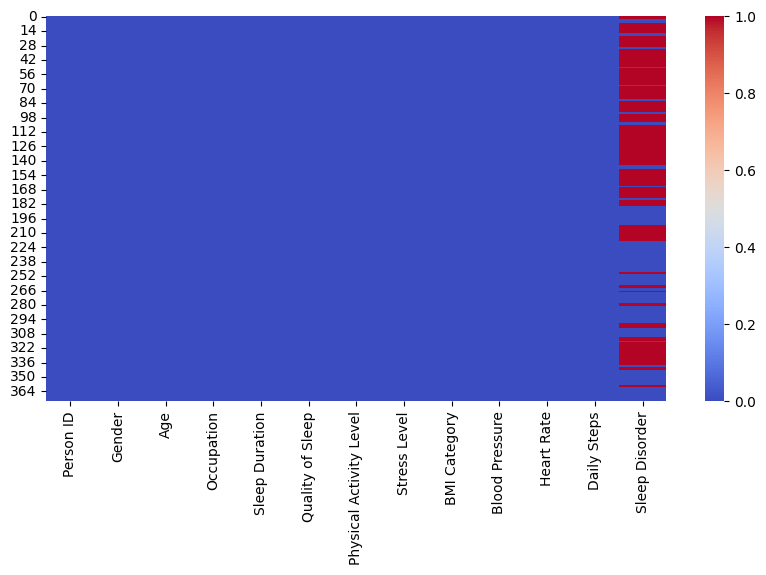

In [487]:
# Heatmap of Missing Values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.show()

In [488]:
# replace nan with no disorder

df['Sleep Disorder'] = df['Sleep Disorder'].replace(np.nan, 'No Disorder')

In [489]:
# Check Null Values

print(df.isnull().sum().sort_values(ascending=False))

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


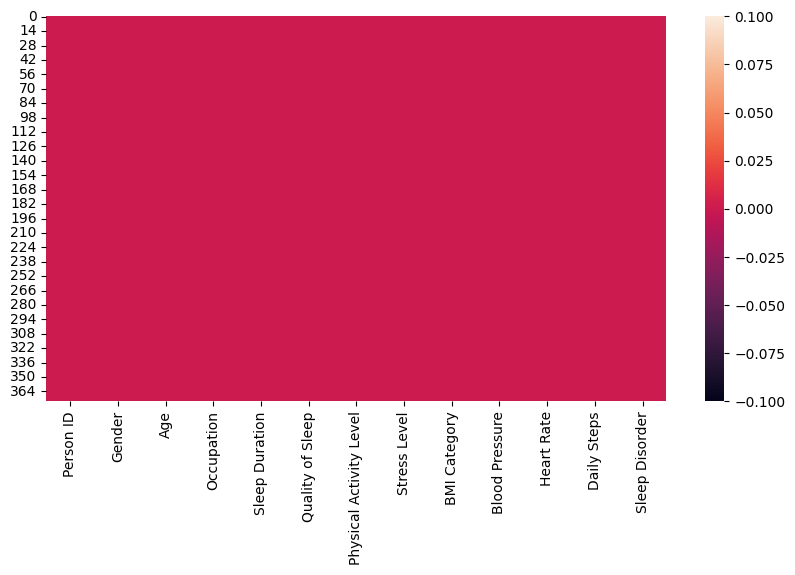

In [490]:
# Heatmap of Missing Values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [491]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [492]:
df.duplicated().sum()

0

In [493]:
print(f'So we have {df.duplicated().sum()} duplicate values in the dataset.')

So we have 0 duplicate values in the dataset.


In [494]:
# Unique values in Occupation

print('Unique Values of Occupation are', df['Occupation'].unique())

Unique Values of Occupation are ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [495]:
# Unique values in BMI Category

print('Unique Values of BMI Category are', df['BMI Category'].unique())

Unique Values of BMI Category are ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [496]:
# Unique values in Blood Pressure

print('Unique Values of Blood Pressure are',df['Blood Pressure'].unique())

Unique Values of Blood Pressure are ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


In [497]:
# Unique values in Sleep Disorder

print('Unique Values of Sleep Disorder are', df['Sleep Disorder'].unique())

Unique Values of Sleep Disorder are ['No Disorder' 'Sleep Apnea' 'Insomnia']


In [498]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
sleep_disorder_counts

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


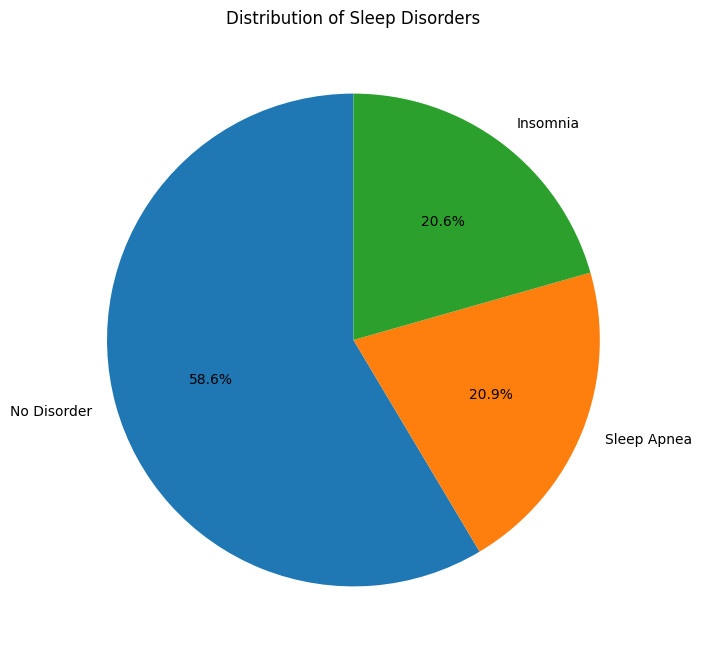

In [499]:
# dictionary to map numerical labels to disorder names

label_mapping = {
    'Insomnia': 'Insomnia',
    'No Disorder': 'No Disorder',
    'Sleep Apnea': 'Sleep Apnea'
}

# Get labels and sizes for the pie chart using the mapping
labels = [label_mapping[label] for label in sleep_disorder_counts.index]
sizes = sleep_disorder_counts.values

# Create the pie chart with disorder names and percentage values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Disorders')
plt.show()

## ***`Pre-Processing`***

In [500]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [501]:
# Check outliers

fig = px.box(df, x='Occupation', y='Sleep Duration')
fig.update_layout(title='Boxplot of Sleep Duration by Occupation',
                  xaxis=dict(title='Occupation'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()

### ***`Categorical to Numerical`***

In [502]:
# Convert categorical to numerical

label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2


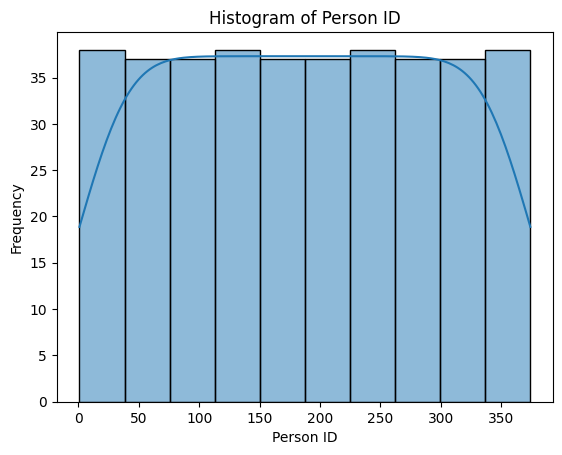

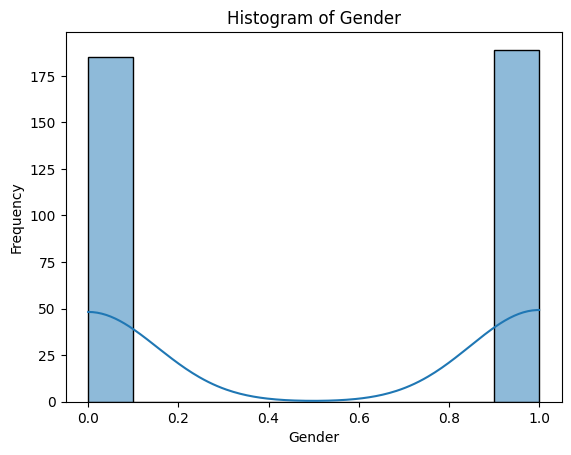

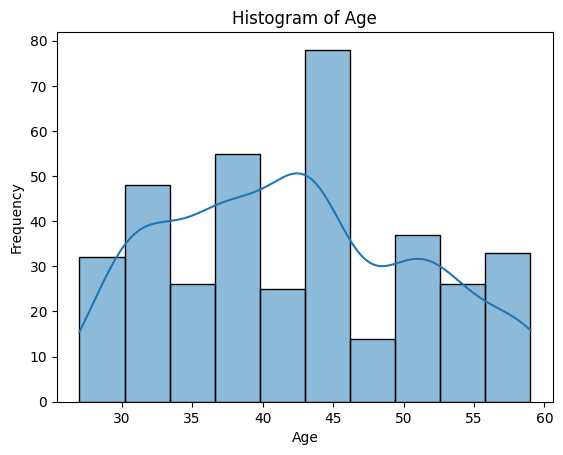

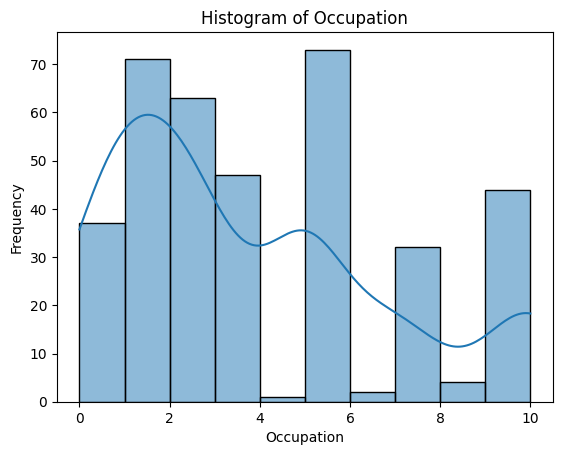

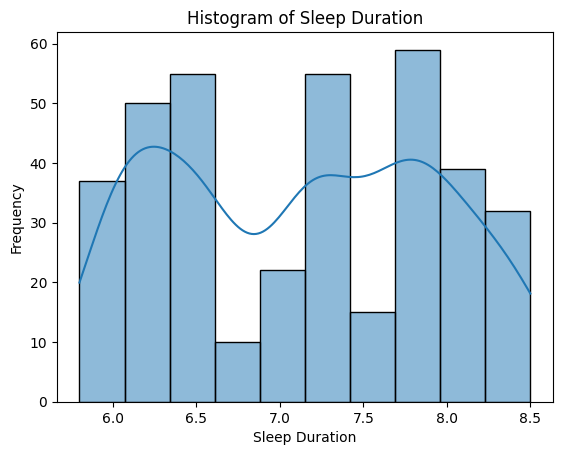

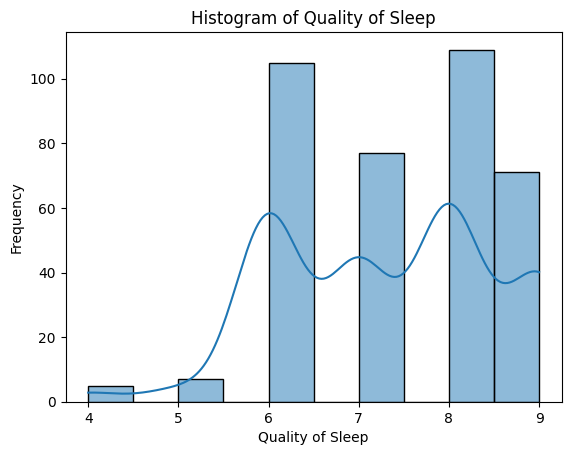

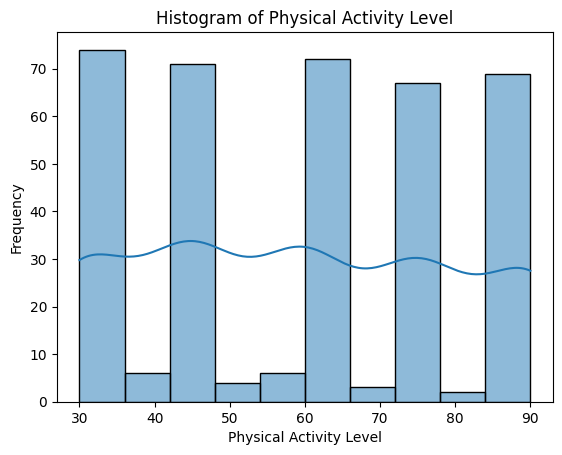

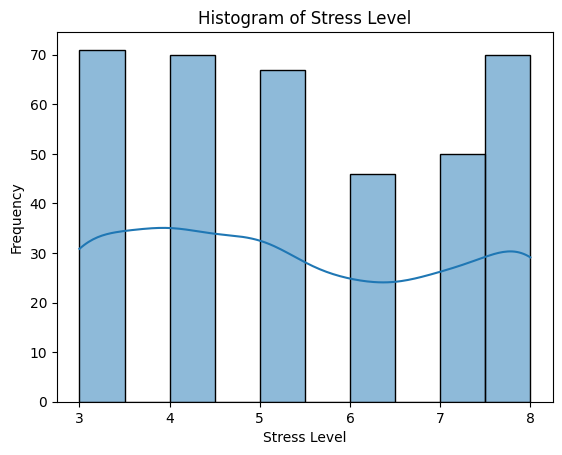

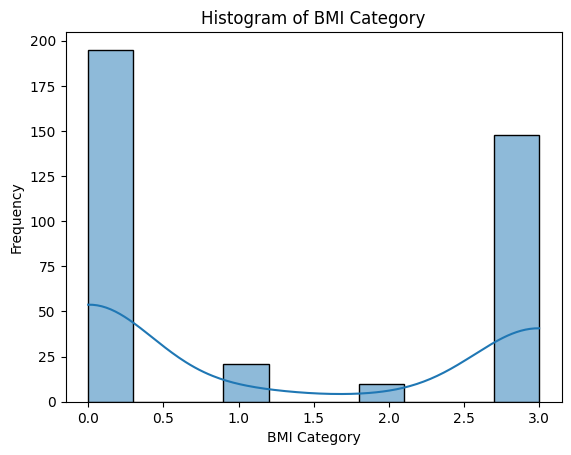

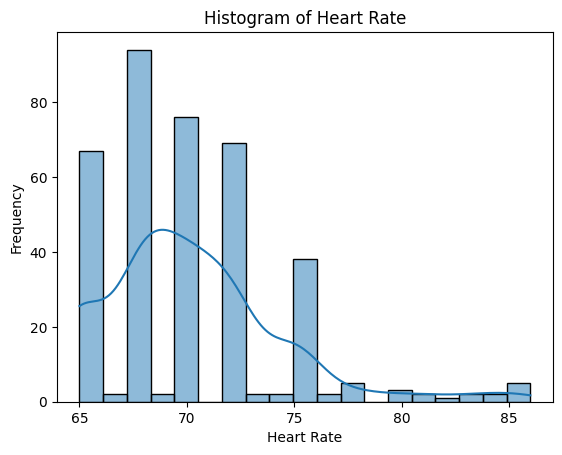

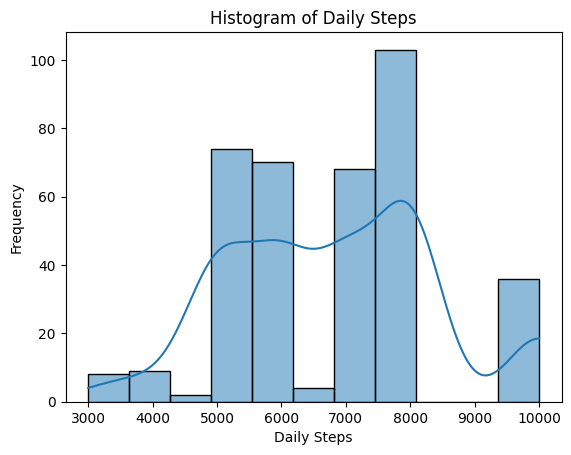

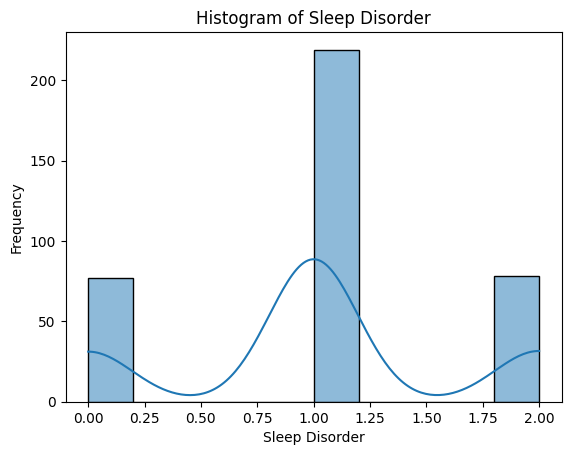

In [503]:
# Iterate through columns and create histograms

for column in df.columns:
  if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numeric
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(df[column], kde=True)  # Create the histogram with KDE
    plt.title(f'Histogram of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the histogram

In [504]:
# Outlier Removal
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps']

# Split 'Blood Pressure' into two columns: 'BloodPressure_Upper_Value', 'BloodPressure_Lower_Value'
df[['BP_Upper_Value', 'BP_Lower_Value']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Update num_col to include the new columns
num_col.extend(['BP_Upper_Value', 'BP_Lower_Value'])

Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

df1 = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [525]:
# Binning Age
df['Age_bin'] = pd.cut(df['Age'], [20, 30, 40, 50, 60], labels=['Young', 'Middle_Age', 'Seniors', 'Old'])
df.head()

# Convert 'Age_bin' to numerical representation using Label Encoding before calculating correlation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Age_bin'] = label_encoder.fit_transform(df['Age_bin'])

# Now calculate correlation and generate the heatmap
fig = px.imshow(df.drop(['Person ID', 'Blood Pressure'], axis=1).corr())
fig.update_layout(title='Correlation Heatmap', width=1200, height=600)
fig.show()

In [506]:
# Pairplot

fig = px.scatter_matrix(df1.drop(['Person ID','Blood Pressure'], axis=1), color='Sleep Disorder',)
fig.update_layout(title='Correlation Heatmap', width=3000, height=2200)

fig.show()


In [507]:
# Histogram by Sleep Disorder

fig = px.histogram(df1, x='Sleep Duration', color='Sleep Disorder', nbins=30)
fig.update_layout(title='Count of Sleep Disorder',
                  xaxis=dict(title='Sleep Duration'),
                  yaxis=dict(title='Count'),
                  legend=dict(title='Sleep Disorder'),
                  showlegend=True)

fig.show()


In [508]:
# Histogram by BMI Category

fig = px.histogram(df1, x='Sleep Duration', color='BMI Category', marginal='rug', nbins=30)
fig.update_layout(title='Count of BMI Category',
                  xaxis=dict(title='Sleep Duration'),
                  yaxis=dict(title='Count'),
                  legend=dict(title='BMI Category'),
                  showlegend=True)
fig.show()


In [509]:
# Boxplot by Gender

fig = px.box(df1, x='Gender', y='Sleep Duration', color='Gender')
fig.update_layout(title='Sleep Duration based on Sex',
                  xaxis=dict(title='Sex'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()


In [510]:
# Boxplot by Occupation

fig = px.box(df1, x='Occupation', y='Sleep Duration', color='Occupation')
fig.update_layout(title='Sleep Duration based on Occupation',
                  xaxis=dict(title='Occupation'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()


In [511]:
# Boxplot by BMI Category

fig = px.box(df1, x='BMI Category', y='Sleep Duration', color='BMI Category')
fig.update_layout(title='Sleep Duration based on BMI Category',
                  xaxis=dict(title='BMI Category'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()


In [512]:
# Boxplot by Sleep Disorder

fig = px.box(df1, x='Sleep Disorder', y='Sleep Duration', color='Sleep Disorder')
fig.update_layout(title='Sleep Duration based on Sleep Disorder',
                  xaxis=dict(title='Sleep Disorder'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()


In [513]:
# Scatterplot with Age, Sleep Duration and BMI Category

fig = px.scatter(df1, x='Age', y='Sleep Duration', color='BMI Category', hover_data=['Age', 'Sleep Duration'])
fig.update_layout(title='Age vs Sleep Duration',
                  xaxis=dict(title='Age'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()


### ***`Binning`***

In [514]:
df['Age'].min()

27

In [515]:
df['Age'].max()

59

In [516]:
df['Age'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

In [517]:
# Binning Age

df['Age_bin'] = pd.cut(df['Age'], [20, 30, 40, 50, 60], labels=['Young', 'Middle_Age', 'Seniors', 'Old'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BP_Upper_Value,BP_Lower_Value,Age_bin
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1,126,83,Young
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1,125,80,Young
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1,125,80,Young
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2,140,90,Young
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2,140,90,Young


In [518]:
# Boxplot: Sleep Disorder by Age_bin

fig = px.bar(df, x='Age_bin', y='Sleep Disorder', color='Age_bin')
fig.update_layout(title='Sleep Disorder by Age_bin',
                  xaxis=dict(title='Age_bin'),
                  yaxis=dict(title='Sleep Disorder'))
fig.show()

In [519]:
# Sleep Duration by Age_bin

fig = px.box(df, x='Age_bin', y='Sleep Duration', color='Age_bin')
fig.update_layout(title='Boxplot: Sleep Duration by Age_bin',
                  xaxis=dict(title='Age_bin'),
                  yaxis=dict(title='Sleep Duration'))
fig.show()


In [520]:
# Age_bin, BMI Category, and Sleep Duration Boxplot by Occupation
df_long = pd.melt(df, id_vars=['Occupation'], value_vars=['Age_bin', 'BMI Category', 'Sleep Duration'],
                  var_name='Variable', value_name='Value')

fig = px.bar(df_long, x='Occupation', y='Value', color='Variable')
fig.update_layout(title='Age_bin, BMI Category, and Sleep Duration by Occupation',
                  xaxis=dict(title='Occupation'),
                  yaxis=dict(title='Value'))
fig.show()

## ***`Machine Learning`***

In [521]:
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']


In [522]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),

]

best_model = None
best_accuracy = 0.0
accuracy_scores = []
model_names = []
cv_accuracies = []
test_accuracies = []


# Iterate over the models and evaluate their performance
for i, (name, model) in enumerate(models): # Use enumerate to get index 'i'
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Store the results
    model_names.append(name)
    cv_accuracies.append(mean_accuracy)

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy
    test_accuracies.append(accuracy)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))




# Check if the current model has the best accuracy
if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 0.9030508474576273
Test Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.91      0.98      0.94        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75

Model: Gradient Boosting
Cross-validation Accuracy: 0.8930508474576271
Test Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.91      0.98      0.94        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75

Model: Support

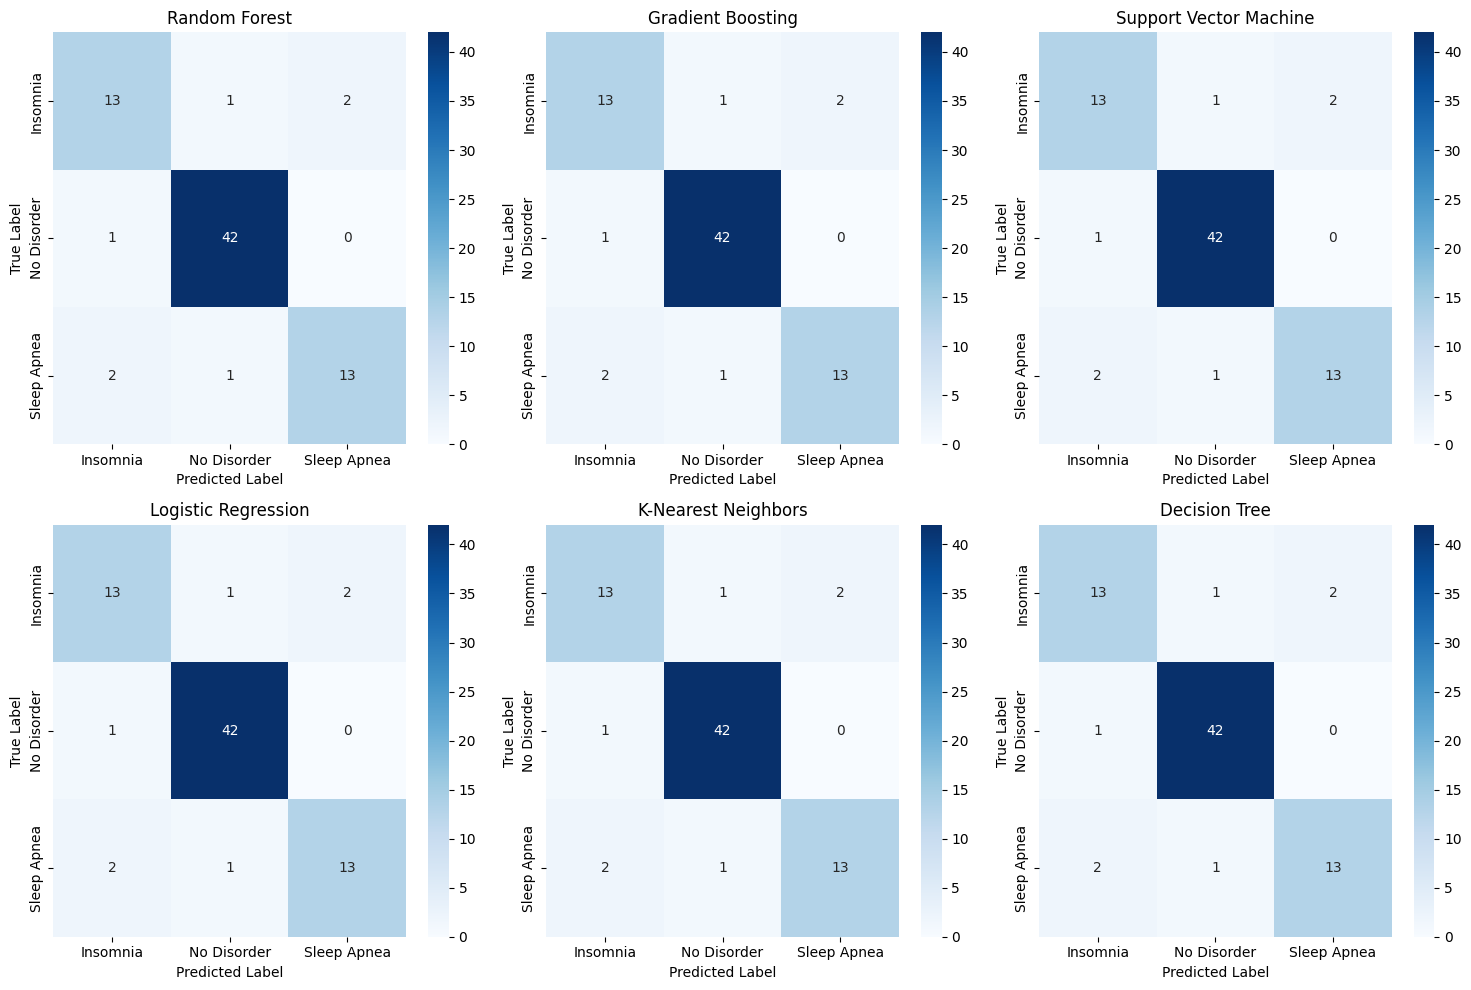

In [523]:
# Create figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterate over the models and evaluate their performance
for i, (name, model) in enumerate(models): # Use enumerate to get index 'i'
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    # Plot confusion matrix on the current subplot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Insomnia', 'No Disorder', 'Sleep Apnea'],
                yticklabels=['Insomnia', 'No Disorder', 'Sleep Apnea'],
                ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [524]:
# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(name='Cross-validation Accuracy', x=model_names, y=cv_accuracies, marker_color='aqua'),
    go.Bar(name='Test Accuracy', x=model_names, y=test_accuracies, marker_color='yellow')
])

# Update layout
fig.update_layout(
    barmode='group',
    title="Model Comparison: Cross-validation vs Test Accuracy",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    template='plotly_dark'
)

# Show the plot
fig.show()

## ***So the Best Model is ` Decision Tree Classifier`, gives high accuracy with `90.06%`.***

## ***If you like `upvote` it and `share`.***